<a href="https://colab.research.google.com/github/nn-hoang/Analysis_projects/blob/main/NewZealand.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Table of content
## **1. Introduction**
## **2. Pre-process data**
### 2.1 Import Libaries
### 2.2 Clean Datasets
### 2.3 Update Datasets
## **3. Analysis**
### 3.1 Room Type
### 3.2 Amenities
### 3.3 Price and Accommodates
### 3.4 Other Categories 
## **4. Other discussion**


# 1 INTRODUCTION

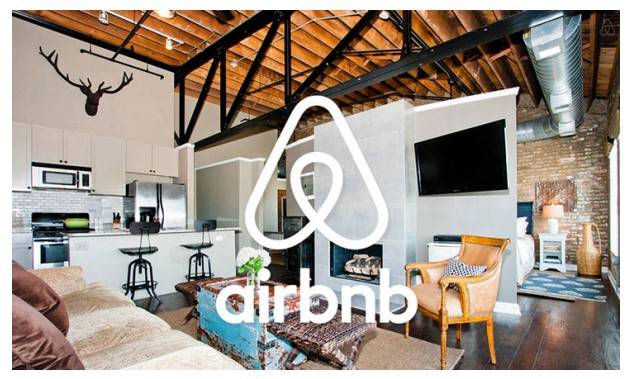

This milestone project uses Airbnb dataset of New Zealand which updated until 09 March, 2023. 

**Key audience**: New hosts in New Zealand who want to start an airbnb.

**Topic**: How to become a Top host when starting an Airbnb in New Zealand



# 2 PRE-PROCESS DATA

## 2.1 Import Libraries

In [1]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.cm as cm

import seaborn as sns
import re
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
from collections import Counter
from wordcloud import WordCloud
from bs4 import BeautifulSoup
import nltk

nltk.download("stopwords")
from nltk.corpus import stopwords
stops = stopwords.words("english")

from nltk.stem.porter import PorterStemmer
porter = PorterStemmer()

#to make the interactive maps
import folium
from folium.plugins import FastMarkerCluster
!pip install geopandas as gpd
from branca.colormap import LinearColormap

nltk.download("omw-1.4")
nltk.download('wordnet')
from nltk.stem import WordNetLemmatizer
lemmatizer = WordNetLemmatizer()

import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

listings = pd.read_csv ('/content/gdrive/MyDrive/DataScience_Milestone_Project/NZ.gz') 


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 25.9 MB/s eta 0:00:00
ERROR: Could not find a version that satisfies the requirement as (from versions: none)
ERROR: No matching distribution found for as


[nltk_data] Downloading package omw-1.4 to /root/nltk_data...
[nltk_data] Downloading package wordnet to /root/nltk_data...


In [3]:
!pwd

/content


## 2.2 Clean Datasets

In [4]:
listings.sample(3)

,id,listing_url,scrape_id,last_searched,last_scraped,name,description,neighborhood_overview,picture_url,host_id,...,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,region_id,region_name,region_parent_id,region_parent_name,region_parent_parent_id,region_parent_parent_name,reviews_per_month
847,4663393,https://www.airbnb.com/rooms/4663393,20230219172247,2023-02-19,2023-02-21,The Gatehouse,Boutique accommodation adjacent to QE Park and...,Friendly relaxed neighbourhood. House in q...,https://a0.muscache.com/pictures/58559447/cb29...,24130021,...,1,0,0,4304,Paekākāriki-Raumati Ward,43,Kapiti Coast District,NaN,NaN,0.68
16813,35268463,https://www.airbnb.com/rooms/35268463,20230219172247,NaN,2023-02-20,Empire Apartment (Stuido in City Center),It is an entire apartment. This apartment feat...,The apartment is 10 minutes' walk from The Auc...,https://a0.muscache.com/pictures/a82953af-00ec...,265528841,...,0,0,0,7605,Waitematā and Gulf Ward,76,Auckland,NaN,NaN,0.07
35073,673445826801593932,https://www.airbnb.com/rooms/673445826801593932,20230219172247,2023-02-19,2023-02-21,2 Bedroom Flat 22 Beach Road,This two bedroom flat is a 5 minute walk from ...,NaN,https://a0.muscache.com/pictures/prohost-api/H...,313223207,...,9,0,0,5499,Area Outside Ward,54,Kaikoura District,NaN,NaN,NaN


In [5]:
listings.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 42818 entries, 0 to 42817
Data columns (total 80 columns):
 #   Column                                        Non-Null Count  Dtype  
---  ------                                        --------------  -----  
 0   id                                            42818 non-null  int64  
 1   listing_url                                   42818 non-null  object 
 2   scrape_id                                     42818 non-null  int64  
 3   last_searched                                 36270 non-null  object 
 4   last_scraped                                  42818 non-null  object 
 5   name                                          42817 non-null  object 
 6   description                                   42469 non-null  object 
 7   neighborhood_overview                         27967 non-null  object 
 8   picture_url                                   42818 non-null  object 
 9   host_id                                       42818 non-null 

In [6]:
# I will drop some unused columns or Nun columns
listings.drop(["id","bathrooms_text","host_about","bedrooms","beds","neighbourhood", "first_review","last_review","requires_license", 
               "region_parent_id","region_parent_name","region_parent_parent_id", "region_parent_parent_name","reviews_per_month", 
               "last_searched","neighborhood_overview","name", "host_neighbourhood","bathrooms", "listing_url","license","host_url",
               "scrape_id","last_scraped","picture_url", "host_name","host_thumbnail_url","host_picture_url","calendar_last_scraped",
               "calculated_host_listings_count_shared_rooms","calculated_host_listings_count_private_rooms", 
               "calculated_host_listings_count_entire_homes","calculated_host_listings_count","calendar_updated","region_id","region_name"], axis=1, inplace=True)
listings.sample(3)

,description,host_id,host_since,host_location,host_response_time,host_response_rate,host_acceptance_rate,host_is_superhost,host_listings_count,host_total_listings_count,...,number_of_reviews_ltm,number_of_reviews_l30d,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,instant_bookable
42523,Relax with the whole family at this peaceful p...,131347354,2017-05-21,"Waimate, New Zealand",within an hour,100%,94%,t,6,6,...,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,f
37390,"Situated down a drive way, an open plan 3 bedr...",148694701,2017-09-01,"Tauranga, New Zealand",within an hour,100%,75%,f,1,1,...,15,1,4.73,4.80,4.67,5.00,4.80,4.73,4.33,f
6320,Bay of Islands is the Birthplace of NZ. All si...,28072871,2015-02-20,"Paihia, New Zealand",within an hour,100%,93%,f,1,1,...,9,1,4.82,4.92,4.94,4.96,4.89,4.83,4.89,f


In [7]:
listings.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 42818 entries, 0 to 42817
Data columns (total 44 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   description                  42469 non-null  object 
 1   host_id                      42818 non-null  int64  
 2   host_since                   42818 non-null  object 
 3   host_location                35016 non-null  object 
 4   host_response_time           36054 non-null  object 
 5   host_response_rate           36054 non-null  object 
 6   host_acceptance_rate         38038 non-null  object 
 7   host_is_superhost            42706 non-null  object 
 8   host_listings_count          42818 non-null  int64  
 9   host_total_listings_count    42818 non-null  int64  
 10  host_verifications           42818 non-null  object 
 11  host_has_profile_pic         42818 non-null  object 
 12  host_identity_verified       42818 non-null  object 
 13  latitude        

In [8]:
listings.duplicated().sum()


1

In [9]:
listings.drop_duplicates(inplace=True)

In [10]:
listings.duplicated().sum()

0

In [11]:
listings.isna().sum()

description                     349
host_id                           0
host_since                        0
host_location                  7802
host_response_time             6764
host_response_rate             6764
host_acceptance_rate           4780
host_is_superhost               112
host_listings_count               0
host_total_listings_count         0
host_verifications                0
host_has_profile_pic              0
host_identity_verified            0
latitude                          0
longitude                         0
property_type                     0
room_type                         0
accommodates                      0
amenities                         0
price                             0
minimum_nights                    0
maximum_nights                    0
minimum_minimum_nights            0
maximum_minimum_nights            0
minimum_maximum_nights            0
maximum_maximum_nights            0
minimum_nights_avg_ntm            0
maximum_nights_avg_ntm      

In [12]:
# I will drop Nan value of review_score_accuracy
listings.dropna(subset="review_scores_accuracy", axis =0, inplace=True)

In [13]:
listings.isna().sum()

description                     211
host_id                           0
host_since                        0
host_location                  6622
host_response_time             5326
host_response_rate             5326
host_acceptance_rate           3441
host_is_superhost                68
host_listings_count               0
host_total_listings_count         0
host_verifications                0
host_has_profile_pic              0
host_identity_verified            0
latitude                          0
longitude                         0
property_type                     0
room_type                         0
accommodates                      0
amenities                         0
price                             0
minimum_nights                    0
maximum_nights                    0
minimum_minimum_nights            0
maximum_minimum_nights            0
minimum_maximum_nights            0
maximum_maximum_nights            0
minimum_nights_avg_ntm            0
maximum_nights_avg_ntm      

<Axes: >

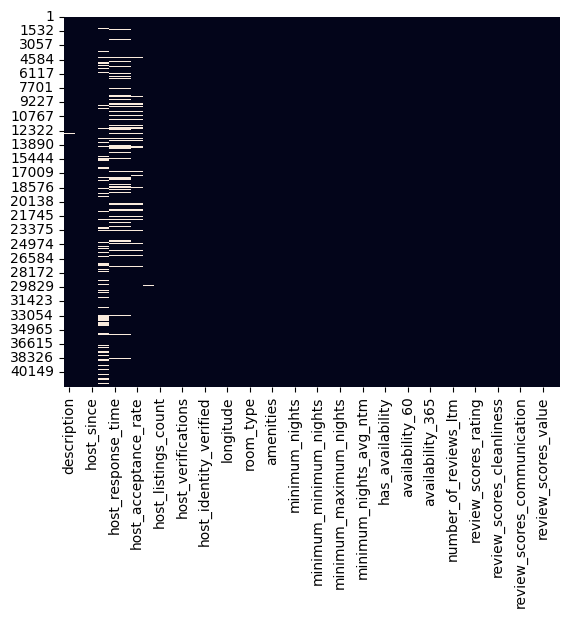

In [14]:
#Visualize the distribution of null_values
sns.heatmap(listings.isna(), cbar=False)

## 2.3 Update Datasets

In [15]:
# Define two groups based on "review score rating", Top group with rating = 5-star  and Low group with rating < 4.6 others is Avg
listings['Group'] = listings['review_scores_rating'].apply(lambda x: 'Top' if x == 5 else 'Low' if x < 4.6 else 'Avg')
df = listings[listings.Group != 'Avg']
df.head(5)

,description,host_id,host_since,host_location,host_response_time,host_response_rate,host_acceptance_rate,host_is_superhost,host_listings_count,host_total_listings_count,...,number_of_reviews_l30d,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,instant_bookable,Group
10,"Small, motel type room, fully insulated. Has ...",282724,2010-11-09,"Napier, New Zealand",within an hour,100%,100%,f,4,9,...,5,4.44,4.21,4.37,4.63,4.67,4.43,4.38,f,Low
21,A big soft Queen Bed awaits your return from y...,675885,2011-06-07,"Hastings, New Zealand",within an hour,100%,100%,t,2,2,...,1,4.48,4.44,4.40,4.60,4.68,4.76,4.28,t,Low
28,<b>The space</b><br />Known as the City of Sai...,817378,2011-07-13,New Zealand,a few days or more,0%,0%,f,1,2,...,0,5.00,5.00,5.00,5.00,5.00,5.00,4.00,f,Top
40,"Private and secluded, the two-bedroom purpose-...",1357276,2011-11-01,"Taiharuru, New Zealand",within an hour,100%,96%,t,7,9,...,2,5.00,5.00,5.00,4.96,5.00,5.00,4.89,t,Top
55,"Welcome to Wellington. This is a warm, sunny r...",1580002,2012-01-08,"Wellington, New Zealand",within a day,100%,75%,f,1,1,...,1,5.00,4.62,4.92,4.77,4.92,4.62,4.92,f,Top


In [16]:
colors = {"Top": "powderblue", "Low":"c"}
colors1 = {"Top Host":"powderblue", "Low Host": "c"}

In [17]:
listings.Group.value_counts()


Avg    23358
Top     9769
Low     5055
Name: Group, dtype: int64

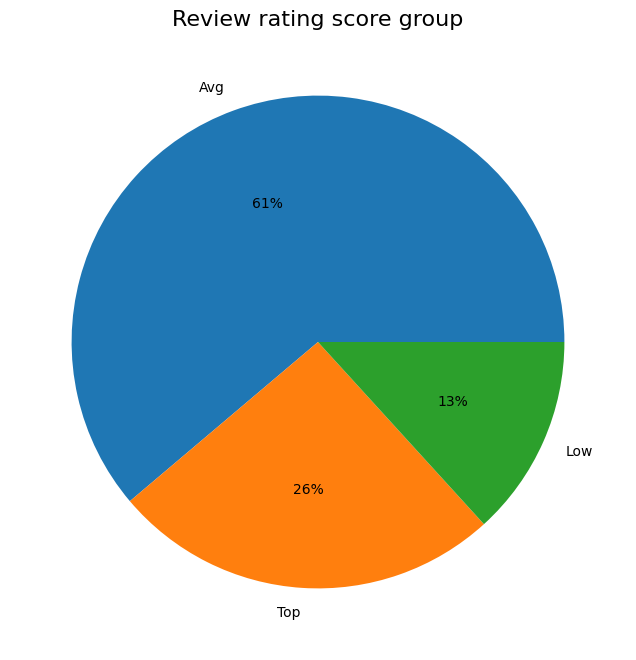

In [18]:
from seaborn.rcmod import palettes
plt.figure(figsize=(8,8))
listings.Group.value_counts().plot(kind="pie",autopct='%.0f%%')
plt.title("Review rating score group",size="16")
plt.ylabel("")
plt.show()

As we can see there are 26% of airbnb's owner got 5 star rating, and 13% got less than 4.6 star rating. We will compare these values on different aspect to see the difference between two groups and see what we can do to improve the review rating score of new host. 

In [19]:
# Normalize accomodates
def normalize_accomodates(x):
  if x==1:
    return 'Single'
  elif x==2:
    return 'Couple'
  elif x <5:
    return 'Small_Group'
  else:
    return 'Big_Group'
df['accommodates_group'] = df['accommodates'].apply(normalize_accomodates)

<ipython-input-19-56b61c128701>:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['accommodates_group'] = df['accommodates'].apply(normalize_accomodates)


In [20]:
# define top location based on the most popular location in New Zealand
top_locations = df[df['host_location'] !="New Zealand"]["host_location"].value_counts()[:10].index
def normalize_location(x):
  if x in top_locations :
    return x.split(',')[0]
  #if x == 'New Zealand':
  # return ''
  return 'Others'

df['location'] = df['host_location'].apply(normalize_location)
listings["location_listing"] = listings["host_location"].apply(normalize_location)

<ipython-input-20-a5d216b38c34>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['location'] = df['host_location'].apply(normalize_location)


In [21]:
stop_words = set(stopwords.words('english'))
stop_words.add('u')

In [22]:
# create new column called "clean_amenities"
# remove "\u*" and lowercase
def clean_word(x):
  # remove html tag
  raw = BeautifulSoup(x, "html.parser")
  raw = raw.get_text()
  clean = re.sub("\n"," ",x)
  clean=re.sub("[^a-zA-Z]", " ", clean).lower()
 # Stem and remove stopwords
  clean = [lemmatizer.lemmatize(word) for word in clean.split() if word not in stop_words]
  return " ".join(clean)

  return clean 

df["clean_amenities"] = df["amenities"].apply(clean_word)

#low_host["clean_amenities"] = low_host["amenities"].apply(clean_word)

<ipython-input-22-1f653660b00c>:5: MarkupResemblesLocatorWarning: The input looks more like a filename than markup. You may want to open this file and pass the filehandle into Beautiful Soup.
  raw = BeautifulSoup(x, "html.parser")
<ipython-input-22-1f653660b00c>:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["clean_amenities"] = df["amenities"].apply(clean_word)


In [23]:
result_dict_top = {}

def count_word(sentence):
    for word in sentence.split():
        if word not in result_dict_top:
            result_dict_top[word] = 1
        else:
            result_dict_top[word] += 1

In [24]:
result_dict_low = {}

def count_word(sentence):
    for word in sentence.split():
        if word not in result_dict_low:
            result_dict_low[word] = 1
        else:
           result_dict_low[word] += 1

In [25]:
### defide them into 2 dataframe class ###

top_host = df[df["Group"]=="Top"]
low_host = df[df["Group"]=="Low"]



### Identity verified.

identify_verified_top = pd.DataFrame(top_host['host_identity_verified'].reset_index(drop = True))
identify_verified_top['status'] = 'Top Host'

identify_verified_low = pd.DataFrame(low_host['host_identity_verified'].reset_index(drop = True))
identify_verified_low['status'] = 'Low Host'

identify_verified = identify_verified_low.append(identify_verified_top).sample(frac=1)

### Host is Superhost DataFrame

superhost_top_performer = pd.DataFrame(top_host['host_is_superhost'].reset_index(drop = True))
superhost_top_performer['status'] = 'Top Host'

superhost_low_performer = pd.DataFrame(low_host['host_is_superhost'].reset_index(drop = True))
superhost_low_performer['status'] = 'Low Host'

superhost = superhost_top_performer.append(superhost_low_performer).sample(frac=1)

### instant bookable

instantBookable_top_performer = pd.DataFrame(top_host['instant_bookable'].reset_index(drop = True))
instantBookable_top_performer['status'] = 'Top Host'

instantBookable_low_performer = pd.DataFrame(low_host['instant_bookable'].reset_index(drop = True))
instantBookable_low_performer['status'] = 'Low Host'

host_bookable = instantBookable_low_performer.append(instantBookable_top_performer).sample(frac=1)

### Host response Rate.

#top_host['host_response_time_str'] = top_host['host_response_time'].apply(changeStr)
#low_host['host_response_time_str'] = low_host['host_response_time'].apply(changeStr)

host_response_top = pd.DataFrame(top_host['host_response_time'].reset_index(drop = True))
host_response_top['status'] = 'Top Host'

host_response_low = pd.DataFrame(low_host['host_response_time'].reset_index(drop = True))
host_response_low['status'] = 'Low Host'

host_response = host_response_low.append(host_response_top).sample(frac=1)

### **Host Response time.**

host_responserate_top_performer = pd.DataFrame(top_host['host_response_rate'].reset_index(drop = True))
host_responserate_top_performer['status'] = 'Top Host'

host_responserate_low_performer = pd.DataFrame(low_host['host_response_rate'].reset_index(drop = True))
host_responserate_low_performer['status'] = 'Low Host'

host_responserate = host_responserate_low_performer.append(host_responserate_top_performer).sample(frac=1)
# ---
percentage_low = list(host_responserate[host_responserate['status'] == 'Low Host']['host_response_rate'].unique())

percentage_top = list(host_responserate[host_responserate['status'] == 'Top Host']['host_response_rate'].unique())

host_responserate_fig = host_responserate[host_responserate['host_response_rate'].isin([1.0, 0.99, 0.96, 0.95, 0.94, 0.0])]

### collecting data into one array ###
data= []
data.append(identify_verified)
data.append(superhost)
data.append(host_bookable)
data.append(host_response)
data.append(host_responserate_fig)

In [26]:
# Count number of amenities
def process_amenities(df, col):
 number_of_amenities=df[col].str.split(",").apply(len)
 return number_of_amenities
 
df["count_amenities"]= process_amenities(df,"amenities")
 
 # return df['amenities'].str.split(',').apply(len)
#top_host['amenities_count'] = process_amenities(top_host)
#low_host['amenities_count'] = process_amenities(low_host)


<ipython-input-26-e842cb49e349>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["count_amenities"]= process_amenities(df,"amenities")


# 3 Analysis 

## **3.1 Room Type**


We will find out what is the most popular room type in New Zealand and make a suggestion for new host

In [27]:
# 3.1. House type (room & property types)
# - Barplot compare room type: majority --> recommend must-have room types / Entire home/apt is a good starting point for new hosts
house_type=df.groupby(["room_type","Group"]).size().reset_index()
house_type.columns=(["room_type","Group","Number_of_listings"])
house_type.set_index("room_type",inplace=True)
house_type=house_type.loc[["Entire home/apt","Private room","Hotel room","Shared room"]].reset_index()
house_type

,room_type,Group,Number_of_listings
0,Entire home/apt,Low,3813
1,Entire home/apt,Top,7301
2,Private room,Low,1123
3,Private room,Top,2326
4,Hotel room,Low,78
5,Hotel room,Top,98
6,Shared room,Low,41
7,Shared room,Top,44


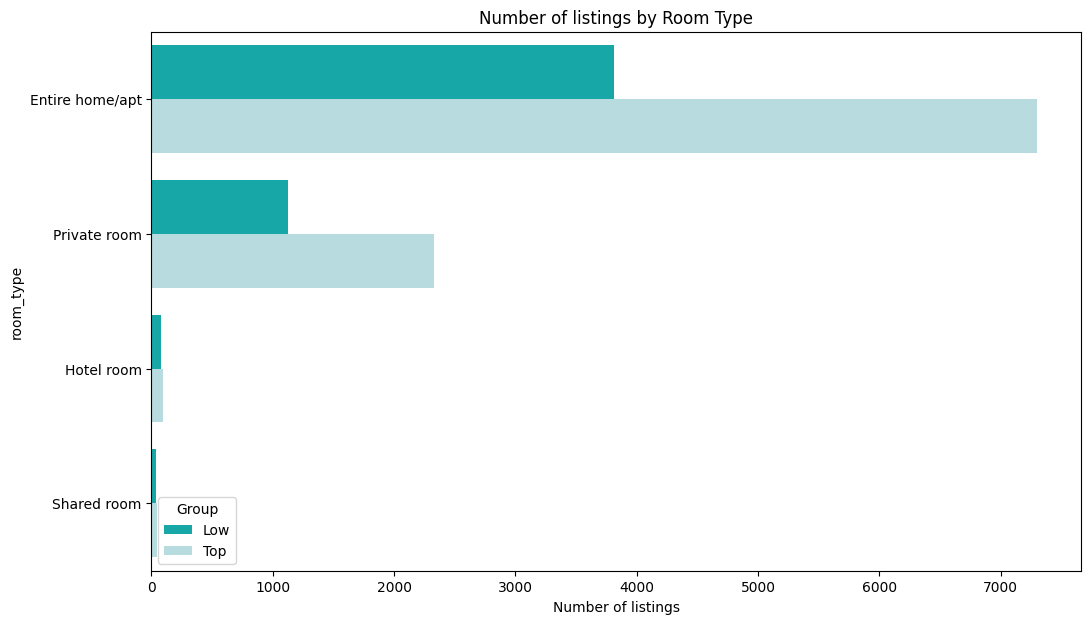

In [28]:
plt.figure(figsize=(12,7))
sns.barplot(data=house_type, x="Number_of_listings", y="room_type",hue="Group",palette= colors)
plt.xlabel("Number of listings")
plt.title("Number of listings by Room Type")
plt.show()

In [29]:
df[df["Group"]=="Top"].groupby("room_type").size()/len(df[df["Group"]=="Top"])

room_type
Entire home/apt    0.747364
Hotel room         0.010032
Private room       0.238100
Shared room        0.004504
dtype: float64

In [30]:
df[df["Group"]=="Low"].groupby("room_type").size()/len(df[df["Group"]=="Low"])

room_type
Entire home/apt    0.754303
Hotel room         0.015430
Private room       0.222156
Shared room        0.008111
dtype: float64

As we can see, the number of Entire house and Private room in both groups are about 75% and 23%, respectively. These two are the most popular house type in New Zealand. Therefore, for the starting, we should consider Entire home or Private room and focusing on rent a Entire home or apartment or private room in house to do airbnb. That seems like an easy choice and safe option for starting. 

## **3.2 Amenities**

We check amenities to compare the number of amenities in Top_host and Low_host


+ Count number of amen: recommend optimal range for number of amenities
+ Word cloud

In [71]:
top_host_amenities= df[df["Group"] =="Top"]["count_amenities"].value_counts().sort_index()
low_host_amenities= df[df["Group"] =="Low"]["count_amenities"].value_counts().sort_index()
top_low_amenities_count=pd.concat([top_host_amenities,low_host_amenities],axis=1)
top_low_amenities_count.columns=["top_host","low_host"]
top_low_amenities_count 


,top_host,low_host
1,11,12.0
2,10,4.0
3,17,17.0
4,15,21.0
5,44,31.0
...,...,...
85,2,NaN
86,1,NaN
87,2,NaN
89,1,NaN


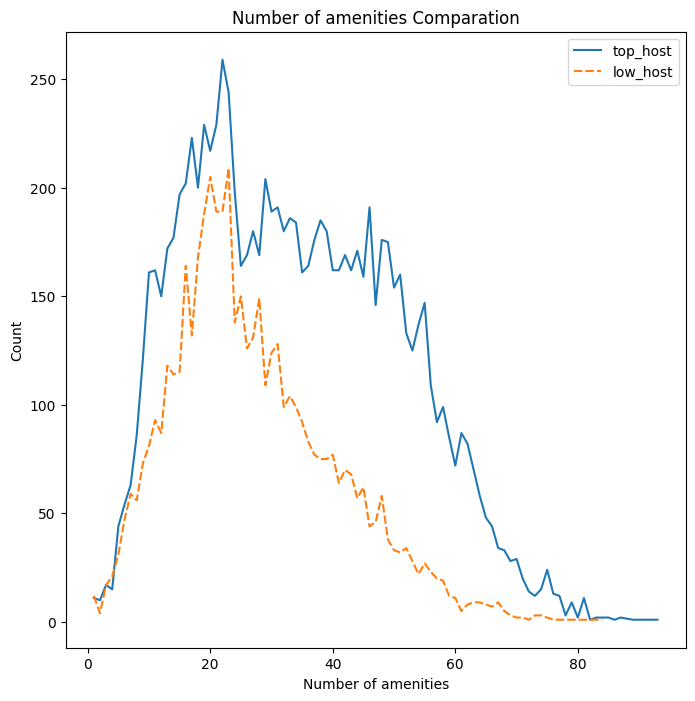

In [72]:
plt.figure(figsize=(8,8))
sns.lineplot(data=top_low_amenities_count)
plt.title("Number of amenities Comparation")
plt.xlabel("Number of amenities")
#plt.xlim(0, 60)
plt.ylabel("Count")
plt.show()

As we can see the most popular number of amenities in both are in range of 18 to 23. So 20 to 25 are optimal number of amenities in a property. Newer host should consider these numbers to supply for their new houses for the beginning. In general, Top host (5-star) has more amenities in their properties than the lower host. We will find out the essential items(the most popular one) in a house 

In [33]:
top_host["clean_amenities"].apply(count_word)

28       None
40       None
55       None
60       None
67       None
         ... 
42698    None
42701    None
42710    None
42720    None
42732    None
Name: clean_amenities, Length: 9769, dtype: object

In [34]:
pd.Series(result_dict_top).sort_values(ascending=False).head(25)

Series([], dtype: float64)

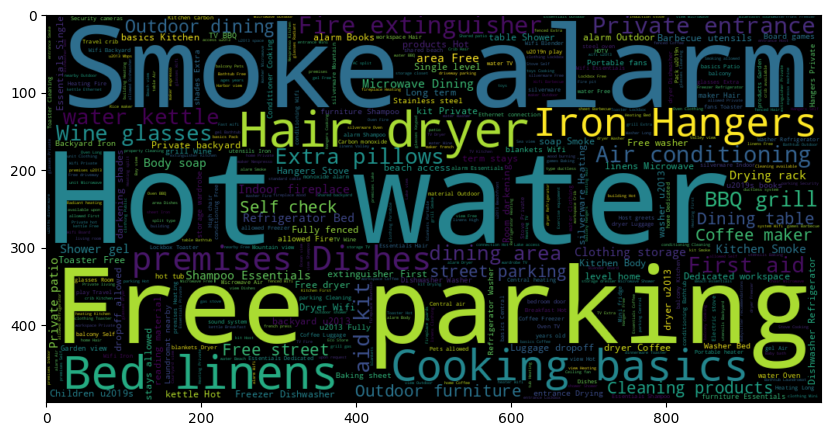

In [35]:
plt.figure(figsize=(10, 10))
WC = WordCloud(width=1000, height=500, max_words=500, min_font_size=5)

# The syntax requires parameter as a body of text.
text = " ".join(top_host["amenities"].values)
words = WC.generate(text)

plt.imshow(words, interpolation="bilinear")
plt.show()

In [36]:
low_host["clean_amenities"].apply(count_word)

10       None
21       None
61       None
63       None
64       None
         ... 
42535    None
42574    None
42625    None
42695    None
42750    None
Name: clean_amenities, Length: 5055, dtype: object

In [37]:
pd.Series(result_dict_low).sort_values(ascending=False).head(25)

free            22964
hot             19483
parking         18334
water           17581
dryer           17028
private         16177
alarm           15416
smoke           13857
wifi            13623
premise         13370
kitchen         13117
essential       12170
washer          11788
heating         11250
silverware      11125
dish            11125
outdoor         11057
refrigerator    10554
allowed         10384
dining          10140
hair            10069
tv               9826
hanger           9723
iron             9684
bed              9519
dtype: int64

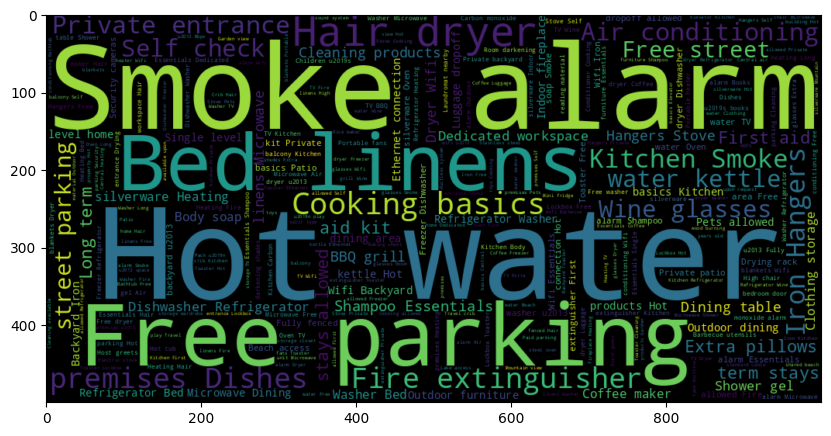

In [38]:
plt.figure(figsize=(10, 10))
WC = WordCloud(width=1000, height=500, max_words=500, min_font_size=5)

# The syntax requires parameter as a body of text.
text = " ".join(low_host["amenities"].values)
words = WC.generate(text)

plt.imshow(words, interpolation="bilinear")
plt.show()

**must have keywords in both groups:
**some keywords in top_host: private, outdoor, dining, view compare to low_host --> top_host focus improve life style and privacy and their own experiment

## **3.3. Price and accommodates**


In [39]:
# change price to float and remove  $
df["price"]=df["price"].str.replace("[$, ]","").astype("float")

<ipython-input-39-8d99622133b1>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["price"]=df["price"].str.replace("[$, ]","").astype("float")


In [40]:
# We got a value "New Zealand", we should drop it before listing top 10 
df["host_location"].value_counts()[:30]

Auckland, New Zealand           3640
New Zealand                      672
Wellington, New Zealand          604
Queenstown, New Zealand          575
Christchurch, New Zealand        537
Tauranga, New Zealand            312
Otago, New Zealand               289
Nelson, New Zealand              241
Wanaka, New Zealand              216
Canterbury, New Zealand          206
Hamilton, New Zealand            184
Rotorua, New Zealand             163
Waikato, New Zealand             161
Bay Of Plenty, New Zealand       150
Northland, New Zealand           137
Dunedin, New Zealand             130
Napier, New Zealand              115
Taranaki, New Zealand             89
Gisborne, New Zealand             87
Mount Maunganui, New Zealand      87
Papamoa, New Zealand              78
New Plymouth, New Zealand         76
Raglan, New Zealand               73
Taupō, New Zealand                73
Tasman, New Zealand               61
Twizel, New Zealand               56
Taupo, New Zealand                53
H

In [41]:
# we drop "Others" value and  concern about Top 10 host location in New Zealand
df['location'].value_counts()[1:]

Auckland        3640
Wellington       604
Queenstown       575
Christchurch     537
Tauranga         312
Otago            289
Nelson           241
Wanaka           216
Canterbury       206
Hamilton         184
Name: location, dtype: int64

In [42]:
top_accommodates= df[(df["Group"]=="Top")]["accommodates_group"].value_counts().sort_index()
low_accommodates= df[(df["Group"]=="Low")]["accommodates_group"].value_counts().sort_index()
top_low_accommodates_count=pd.concat([top_accommodates,low_accommodates],axis=1)
top_low_accommodates_count.columns=["top_host","low_host"]
top_low_accommodates_count = top_low_accommodates_count.loc[["Big_Group","Small_Group","Couple","Single"]]
top_low_accommodates_count = top_low_accommodates_count.reset_index()
top_low_accommodates_count

,index,top_host,low_host
0,Big_Group,4280,2239
1,Small_Group,2033,1204
2,Couple,3143,1436
3,Single,313,176


In [43]:
#Big_group occupied nearly 44% and 2nd one is Couple took  31% in total number of listings in NZ
top_low_accommodates_count["total"]=top_low_accommodates_count["top_host"]+top_low_accommodates_count["low_host"]
top_low_accommodates_count["percent"]=top_low_accommodates_count["total"]/len(df["accommodates_group"])
top_low_accommodates_count

,index,top_host,low_host,total,percent
0,Big_Group,4280,2239,6519,0.439760
1,Small_Group,2033,1204,3237,0.218362
2,Couple,3143,1436,4579,0.308891
3,Single,313,176,489,0.032987


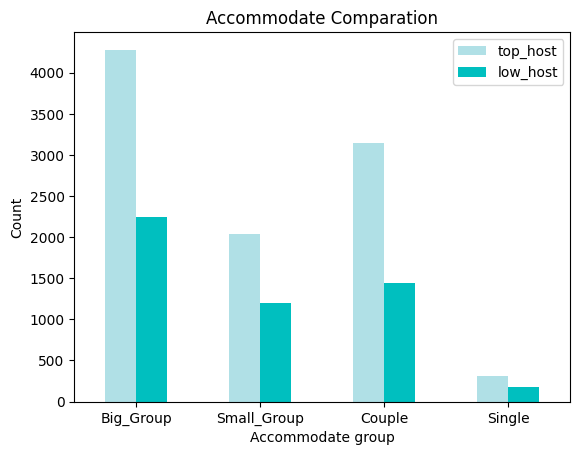

In [44]:
# create a new figure
fig, ax = plt.subplots()

# plot the two columns on the same axis
top_low_accommodates_count.plot(kind="bar", x="index", y=["top_host", "low_host"], ax=ax, color=["powderblue","c"])
ax.set_xlabel("Accommodate group")
ax.set_ylabel("Count")
ax.set_title("Accommodate Comparation")
ax.set_xticklabels(top_low_accommodates_count["index"], rotation=0)
# show the plot
plt.show()


As we can see, the accommodate group of Top host and low host count for. Most airbnb in New Zealand build for group of 5 and above with more than 4200 properties. Second one is room for 2 people with more than 3100 houses. New host can consider the property can be accommodated 2 people or more than 5 people as the beginning.  

In [45]:
single_acc=df[df.accommodates_group=='Single']['location'].value_counts().reset_index()
couple_acc=df[df.accommodates_group=='Couple']['location'].value_counts().reset_index()
small_group_acc=df[df.accommodates_group=='Small_Group']['location'].value_counts().reset_index()
big_group_acc=df[df.accommodates_group=='Big_Group']['location'].value_counts().reset_index()

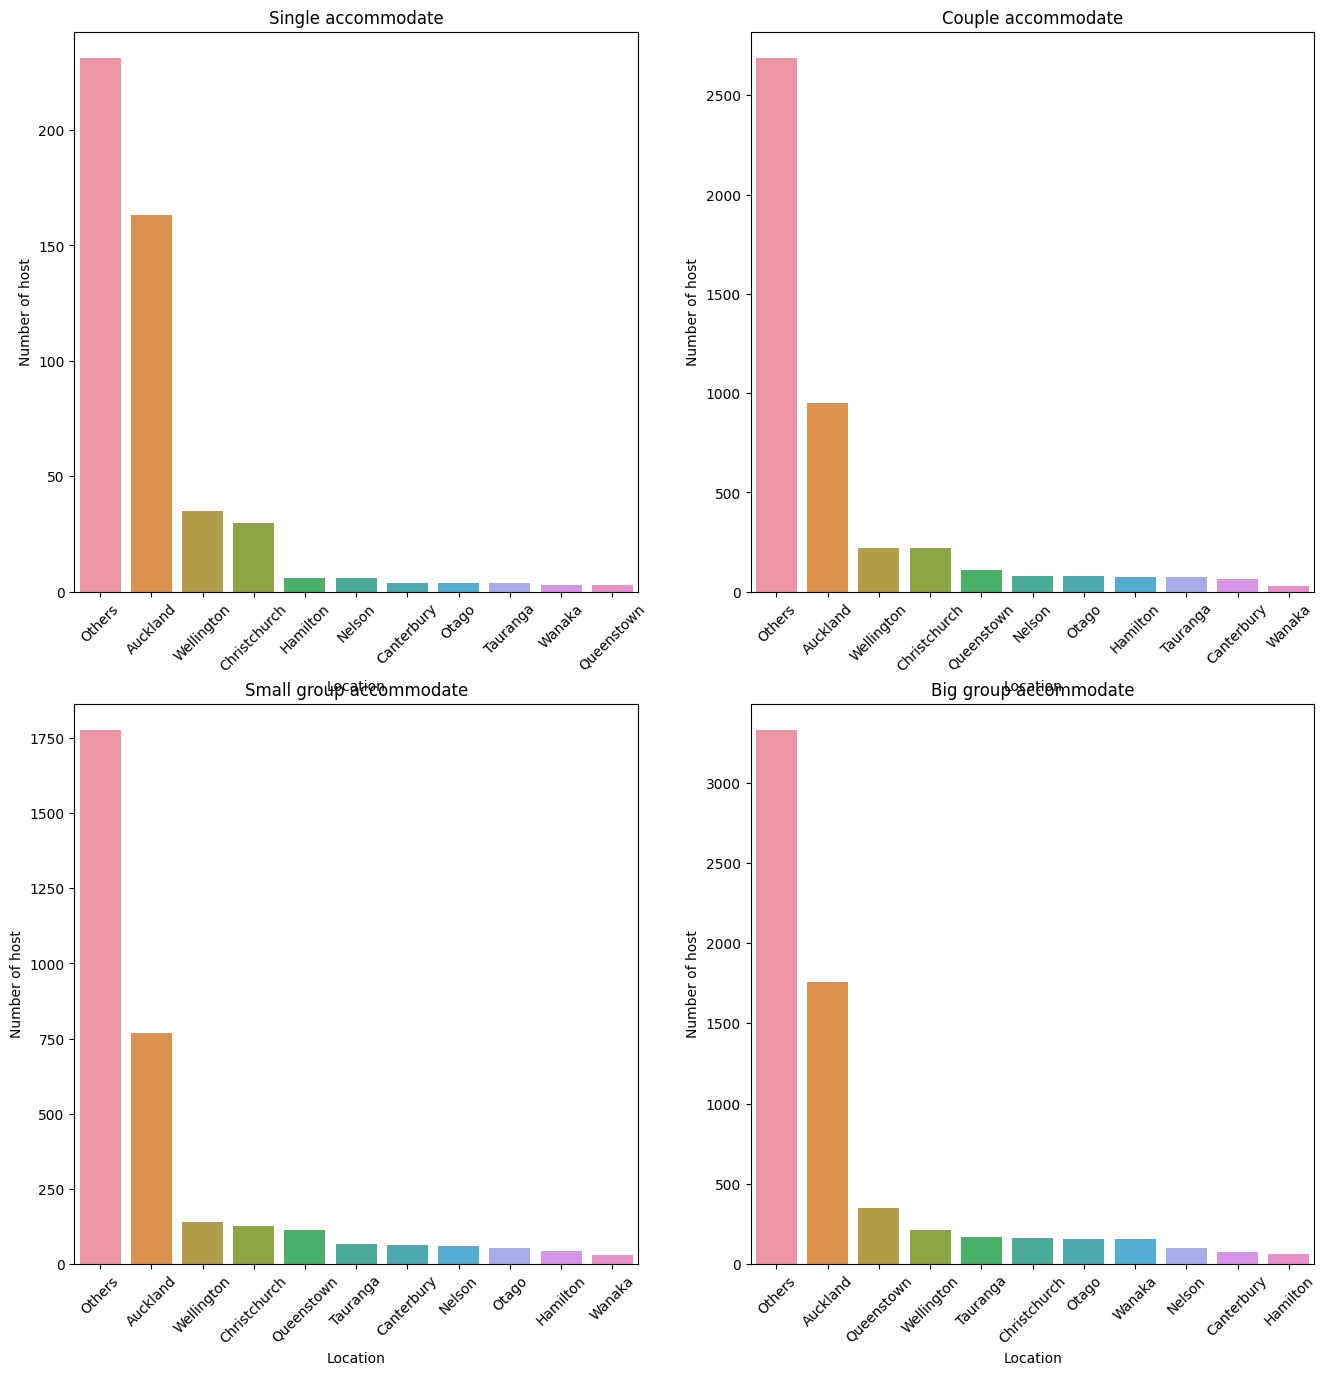

In [46]:
# add subplots, each subplot corresponding to each type of accommodates
# accommodates = single
fig = plt.figure(figsize=(16,16))

plt.subplot(221)
sns.barplot(x=single_acc["index"], y=single_acc["location"])
plt.xticks(rotation=45)
plt.ylabel("Number of host")
plt.title("Single accommodate")
plt.xlabel("Location")

plt.subplot(222)
sns.barplot(x=couple_acc["index"], y=couple_acc["location"])
plt.xticks(rotation=45)
plt.ylabel("Number of host")
plt.title("Couple accommodate")
plt.xlabel("Location")

plt.subplot(223)
sns.barplot(x=small_group_acc["index"], y=small_group_acc["location"])
plt.xticks(rotation=45)
plt.xlabel("Location")
plt.ylabel("Number of host")
plt.title("Small group accommodate")

plt.subplot(224)
sns.barplot(x=big_group_acc["index"], y=big_group_acc["location"])
plt.xticks(rotation=45)
plt.xlabel("Location")
plt.ylabel("Number of host")
plt.title("Big group accommodate")
plt.show()

In [47]:
# we will find out the price of each type of room_type in Top 10 host location in New Zealand
top_single_price = df[(df["Group"] == "Top") & (df["accommodates_group"]=='Single')].groupby(['location',"room_type"])["price"].mean()
top_single_price=top_single_price.reset_index()
low_single_price=df[(df.Group == "Low") & (df.accommodates_group=='Single')].groupby(['location',"room_type"])["price"].mean()
low_single_price= low_single_price.reset_index()
top_couple_price=df[(df.Group == "Top") & (df.accommodates_group=='Couple')].groupby(['location',"room_type"])["price"].mean()
top_couple_price=top_couple_price.reset_index()
low_couple_price=df[(df.Group == "Low") & (df.accommodates_group=='Couple')].groupby(['location',"room_type"])["price"].mean()
low_couple_price=low_couple_price.reset_index()

In [48]:
#check  price 3500 per night for Single
#df[(df["price"] == 3500.0) & (df["accommodates_group"]== "Single")].values
# I checked this outliner value. This one defined as house for 1 person, but actually it's big house with pool and can accommodated 20 people for party or events.

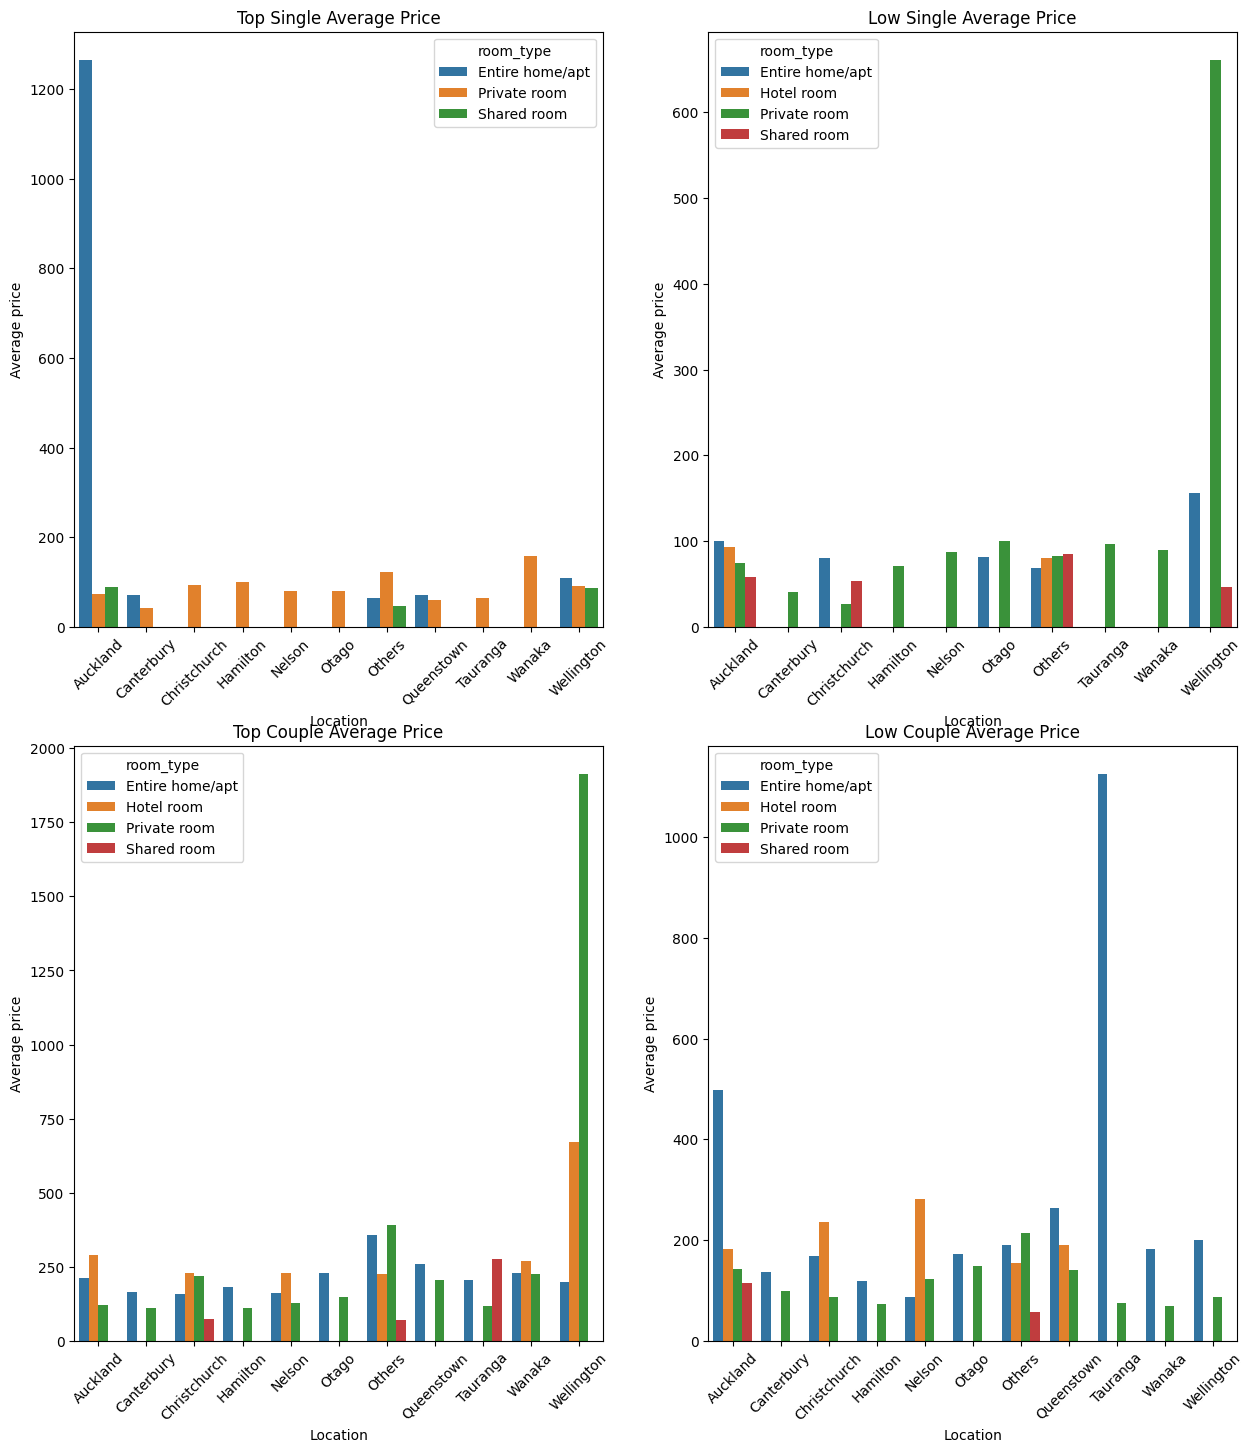

In [49]:
fig = plt.figure(figsize=(15,17))

plt.subplot(221)
sns.barplot(data=top_single_price, x="location", y="price", hue="room_type")
plt.xticks(rotation=45)
plt.ylabel("Average price")
plt.title("Top Single Average Price")
plt.xlabel("Location")

plt.subplot(222)
sns.barplot(data=low_single_price,x="location", y="price",hue="room_type")
plt.xticks(rotation=45)
plt.ylabel("Average price")
plt.title("Low Single Average Price")
plt.xlabel("Location")

plt.subplot(223)
sns.barplot(data=top_couple_price,x="location", y="price", hue="room_type")
plt.xticks(rotation=45)
plt.xlabel("Location")
plt.ylabel("Average price")
plt.title("Top Couple Average Price")

plt.subplot(224)
sns.barplot(data=low_couple_price, x="location", y="price", hue="room_type")
plt.xticks(rotation=45)
plt.xlabel("Location")
plt.ylabel("Average price")
plt.title("Low Couple Average Price")
plt.show()

In [50]:
top_small_group_price=df[(df.Group == "Top") & (df.accommodates_group=='Small_Group')].groupby(['location',"room_type"])["price"].mean()
top_small_group_price=top_small_group_price.reset_index()
low_small_group_price=df[(df.Group == "Low") & (df.accommodates_group=='Small_Group')].groupby(['location',"room_type"])["price"].mean()
low_small_group_price=low_small_group_price.reset_index()
top_big_group_price=df[(df.Group == "Top") & (df.accommodates_group=='Big_Group')].groupby(['location',"room_type"])["price"].mean()
top_big_group_price=top_big_group_price.reset_index()
low_big_group_price=df[(df.Group == "Low") & (df.accommodates_group=='Big_Group')].groupby(['location',"room_type"])["price"].mean()
low_big_group_price=low_big_group_price.reset_index()

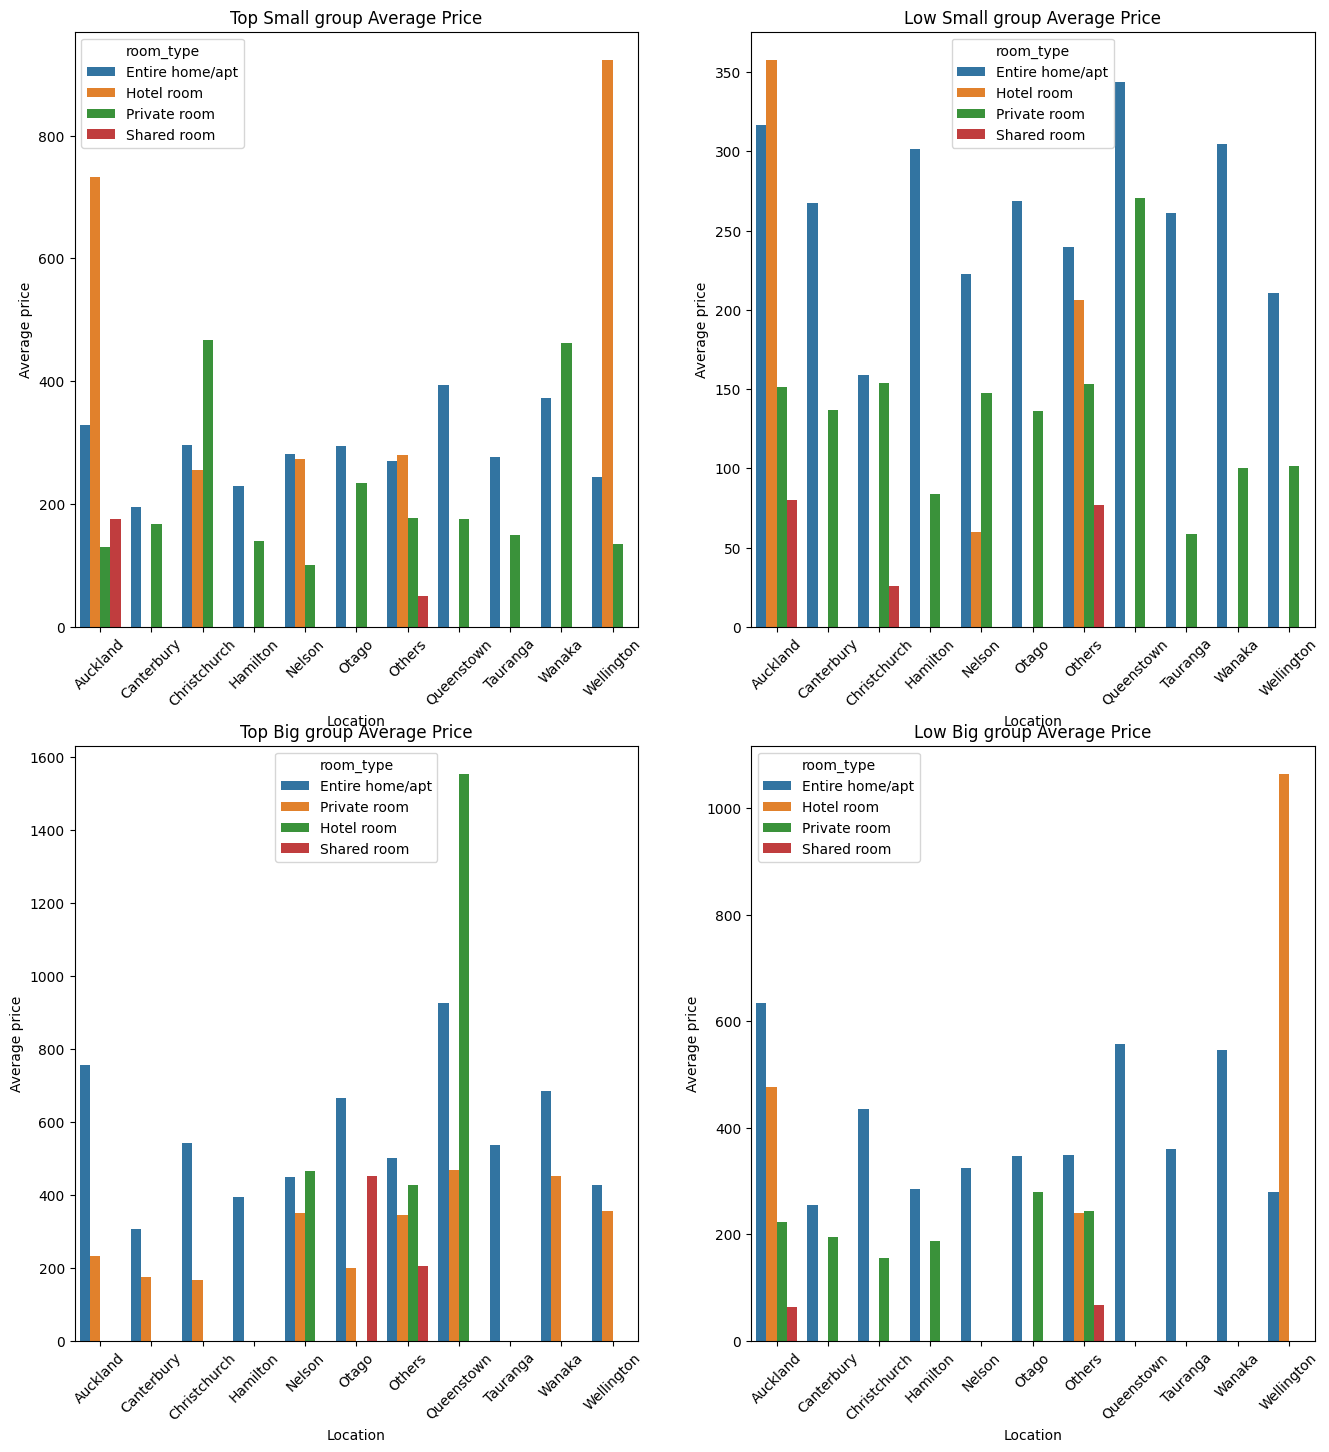

In [51]:
fig = plt.figure(figsize=(16,17))

plt.subplot(221)
sns.barplot(data=top_small_group_price,x="location", y="price", hue="room_type")
plt.xticks(rotation=45)
plt.ylabel("Average price")
plt.title("Top Small group Average Price")
plt.xlabel("Location")

plt.subplot(222)
sns.barplot(data=low_small_group_price,x="location", y="price",hue="room_type")
plt.xticks(rotation=45)
plt.ylabel("Average price")
plt.title("Low Small group Average Price")
plt.xlabel("Location")

plt.subplot(223)
sns.barplot(data=top_big_group_price,x="location", y="price", hue="room_type")
plt.xticks(rotation=45)
plt.xlabel("Location")
plt.ylabel("Average price")
plt.title("Top Big group Average Price")

plt.subplot(224)
sns.barplot(data=low_big_group_price, x="location", y="price", hue="room_type")
plt.xticks(rotation=45)
plt.xlabel("Location")
plt.ylabel("Average price")
plt.title("Low Big group Average Price")
plt.show()

New host can consider these average prices in different states to start their airbnb with competitive price.

##**3.4 Other Categories**

Other categories include: Identified listings, Superhost Listings, Instant Bookable Feature, and host respond time

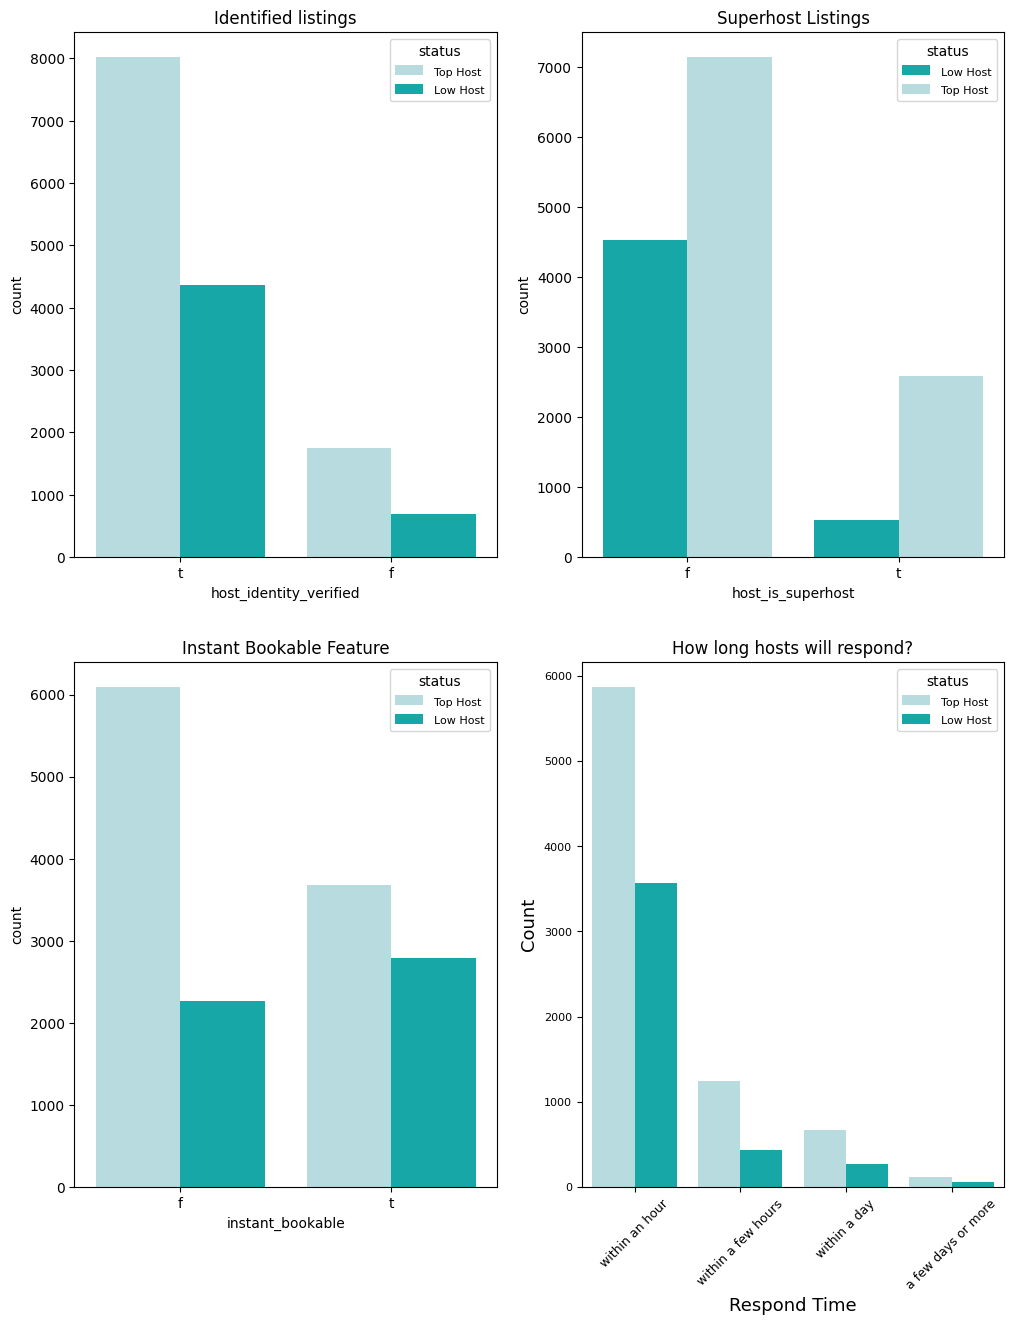

In [52]:
fig, ax = plt.subplots(figsize=(12,15), nrows=2, ncols=2)
x_data= ['host_identity_verified','host_is_superhost','instant_bookable','host_response_time','host_response_rate']
title= ['Identified listings','Superhost Listings', 'Instant Bookable Feature', 'How long hosts will respond?' ]

x_axis= ['Percentage','Activate/Not','True/Not','Respond Time']
y_axis= ['Count']
cnt=0

for x in range(2):
    for y in range(2):
        
        ax[x][y].set_title(title[cnt], fontsize=12)
        sns.countplot(x=x_data[cnt], hue='status', data=data[cnt], palette=colors1, orient='h', ax=ax[x][y])
        plt.setp(ax[x][y].get_legend().get_texts(), fontsize='8') # for legend text
        plt.setp(ax[x][y].get_legend().get_title(), fontsize='10') # for legend title
        plt.xticks(fontsize=9, rotation=45)
        plt.yticks(fontsize=8)
        plt.xlabel(x_axis[cnt], fontsize=13)
        p=plt.ylabel(y_axis[0], fontsize=13)
        
        cnt+=1

In [53]:
top_host.groupby("host_response_time").size()/len(top_host.host_response_time)

host_response_time
a few days or more    0.012181
within a day          0.068175
within a few hours    0.127342
within an hour        0.600880
dtype: float64

In [54]:
low_host.groupby("host_response_time").size()/len(low_host.host_response_time)

host_response_time
a few days or more    0.012265
within a day          0.054204
within a few hours    0.086647
within an hour        0.706627
dtype: float64

top_host definitely is better than low_host in terms of respond  time,  instant bookable, identity and super host, which is what  new host should do to  get better outcome when open a new business

# 4 Other discussion

we list number of new host each year since 2012 to 2022 of all dataset.

In [55]:
# convert host_since to datetime
listings["host_since"]=pd.to_datetime(listings["host_since"])

In [56]:
listings["host_since_year_listing"]=listings["host_since"].dt.to_period("Y")


In [57]:
top_10_listing= listings[listings["location_listing"] != "Others"]

In [58]:
listing_newhost_yearly=top_10_listing.groupby(["host_since_year_listing","location_listing"])["host_id"].count()
listing_newhost_yearly= listing_newhost_yearly.loc["2012":"2022"]
listing_newhost_yearly=listing_newhost_yearly.reset_index()
listing_newhost_yearly["host_since_year_listing"]=listing_newhost_yearly["host_since_year_listing"].astype("string")
listing_newhost_yearly

,host_since_year_listing,location_listing,host_id
0,2012,Auckland,172
1,2012,Canterbury,4
2,2012,Christchurch,27
3,2012,Hamilton,11
4,2012,Nelson,19
...,...,...,...
103,2022,Nelson,2
104,2022,Otago,1
105,2022,Queenstown,20
106,2022,Tauranga,8


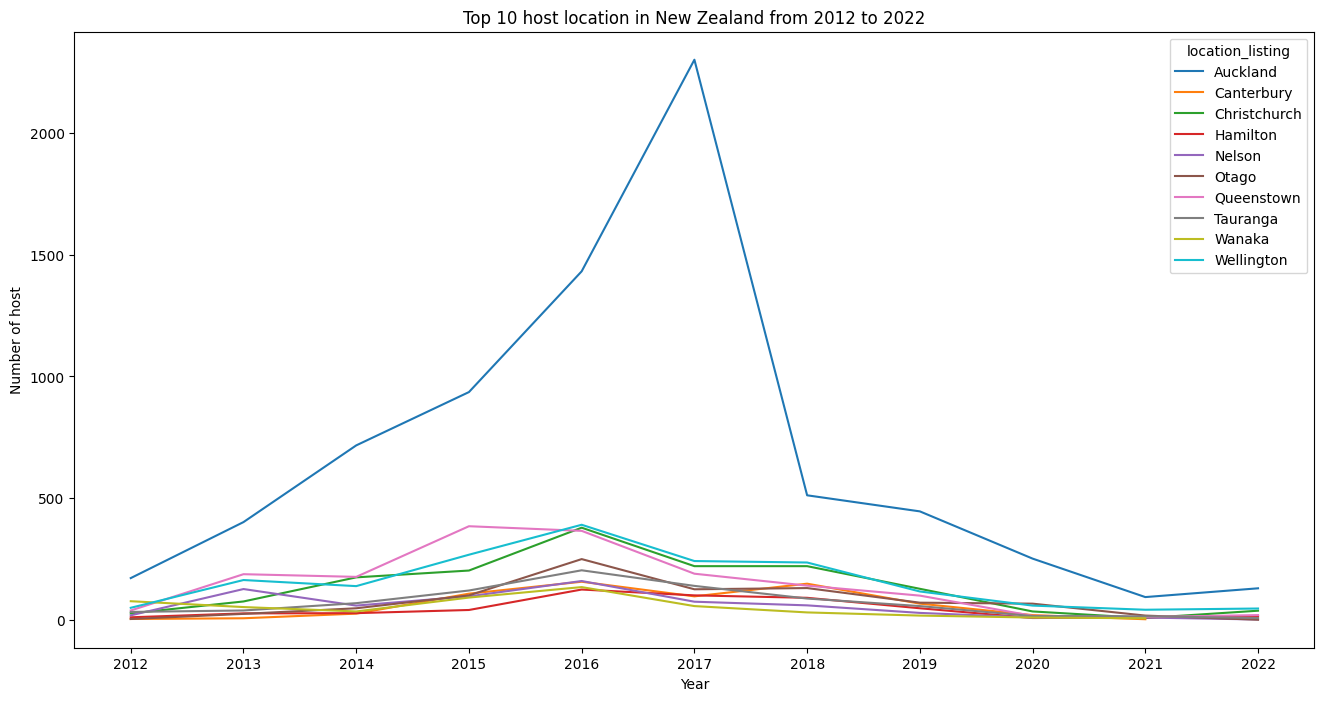

In [59]:
plt.figure(figsize=(16,8))
plt.title("Top 10 host location in New Zealand from 2012 to 2022")
sns.lineplot(data=listing_newhost_yearly, x="host_since_year_listing",y="host_id",hue="location_listing")
plt.ylabel("Number of host")
plt.xlabel("Year")
plt.show()


In [60]:
listing_newhost_yearly.groupby("location_listing")["host_id"].sum()/listing_newhost_yearly.host_id.sum()

location_listing
Auckland        0.455464
Canterbury      0.039300
Christchurch    0.093076
Hamilton        0.031169
Nelson          0.039916
Otago           0.051866
Queenstown      0.100715
Tauranga        0.048663
Wanaka          0.031724
Wellington      0.108106
Name: host_id, dtype: float64

In [61]:
listing_newhost_yearly.host_id.sum()

16234

There were dramatical decrease in the number of listings in  NZ in 2018, the reason would be the new tax policies from gov which was required the short term rental accommodation paid tax after the hotel industry complained it was needed to create a level playing field. And from 2019, the spread out of Covid 19 was pushed more pressure on short term rental accommodation in NZ, that would explain the reason of reducing number of new hosts in NZ.

source: https://cgpm.co.nz/blog/20-faq-about-making-money-as-a-landlord-in-nz/#:~:text=Rental%20property%20tax,for%20income%20over%20NZ%2470%2C000.

 https://www2.deloitte.com/nz/en/pages/tax-alerts/articles/tax-changes-residential-rental-owners.html

In [62]:
# mapping the location of host in NZ. Host in NZ spread out from North to South. But 70% number of listings on the North Island and 30% located on the South Island
lats2018 = listings['latitude'].tolist()
lons2018 = listings['longitude'].tolist()
locations = list(zip(lats2018, lons2018))

map1 = folium.Map(location=[-41.5085, 172.3982], zoom_start=9.5)
FastMarkerCluster(data=locations).add_to(map1)
map1

In [63]:
# Mount to Google Sheets 
#from google.colab import auth
#auth.authenticate_user()

# Import neccessary libraries 
#import gspread
#from gspread_dataframe import set_with_dataframe
#from google.auth import default
#creds, _ = default()

# Authorize Google Sheets API
#gc = gspread.authorize(creds)

In [64]:
# Create a new Google Spreadsheets
#sh = gc.create('airbnbNewZealand1') 

In [65]:
#def export_data_to_new_sheet(gsheet_key, worksheet_name, data):
   #sh = gc.open_by_key(gsheet_key)
   # To create a new worksheet with 1000 rows and 26 columns
   #worksheet = sh.add_worksheet(worksheet_name, 1000, 26)
   #set_with_dataframe(worksheet, data)

In [66]:
# Mount to Google Sheets
#from google.colab import auth

#auth.authenticate_user()

# Import neccessary libraries
#import gspread
#from gspread_dataframe import set_with_dataframe

Create new spreadsheet, this step is only ran in the first time exporting data to gsheet.  

In [67]:
# Authorize Google Sheets API
#from google.auth import default

#creds, _ = default()
#gc = gspread.authorize(creds)

# Create a new Google Spreadsheets (CREATE NEW ONE)
#sh = gc.create("NewZ")



In [68]:
# ❗️ Note that before export data, you have to create the empty sheets in the Google Sheet first
def export_data_to_new_sheet(gsheet_key, worksheet_name, data):
    """gsheet_key (str): ID of Google Sheet File. (Key is the part behind /d/ and before /edit
                For example: https://docs.google.com/spreadsheets/d/1WISuNUrWc-7BPO2s-pD3P3qqqgiLh0wRpvTNNtN21gA/edit?usp=sharing
                Key is 1WISuNUrWc-7BPO2s-pD3P3qqqgiLh0wRpvTNNtN21gA
    worksheet_name: name of sheet in spreadsheet
    data (DataFrame): data to write
    """
    #sh = gc.open_by_key(gsheet_key)
    # ADD NEW WORKSHEET
    #worksheet = sh.add_worksheet(worksheet_name, 1000, 26)
    #set_with_dataframe(worksheet, data)

In [69]:
#export_data_to_new_sheet(
#    "1g6RWgZi13rNnKRf9g5CL1uvlrfKAT8af-tg9fGM5WGw", "df" , df)
#export_data_to_new_sheet(
#    "1g6RWgZi13rNnKRf9g5CL1uvlrfKAT8af-tg9fGM5WGw", "top&low accommodates", top_low_accommodates_count)
#export_data_to_new_sheet(
#    "1g6RWgZi13rNnKRf9g5CL1uvlrfKAT8af-tg9fGM5WGw", "house type", house_type)
#export_data_to_new_sheet(
 #  "1g6RWgZi13rNnKRf9g5CL1uvlrfKAT8af-tg9fGM5WGw", "top_low_amenities_count", top_low_amenities_count)


In [70]:
# OPEN THE OLD  ONE
#sh = gc.open_by_key("1g6RWgZi13rNnKRf9g5CL1uvlrfKAT8af-tg9fGM5WGw")
#worksheet = sh.get_worksheet(0)
#worksheet